<a href="https://colab.research.google.com/github/neehasajja/waymo-opendataset/blob/main/testing/lidar_camera_projection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
     

Mounted at /content/drive


In [ ]:
!pip3 install waymo-open-dataset-tf-2-6-0

In [3]:
import os
import pyarrow.parquet as pq

# Set the path to the metadata file
metadata_file_path = '/content/drive/MyDrive/testing/lidar_camera_projection/_metadata'

# Read the metadata file
metadata_file = pq.ParquetFile(metadata_file_path)

# Get the metadata
file_metadata = metadata_file.metadata
schema_metadata = file_metadata.metadata

# Print the metadata
print("File metadata:", file_metadata)
print("Schema metadata:", schema_metadata)

File metadata: <pyarrow._parquet.FileMetaData object at 0x7fbdcf26d7c0>
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 8
  num_rows: 15505
  num_row_groups: 64
  format_version: 2.6
  serialized_size: 106337
Schema metadata: {b'ARROW:schema': b'/////0AKAAAQAAAAAAAKAA4ABgAFAAgACgAAAAABBAAQAAAAAAAKAAwAAAAEAAgACgAAAKgGAAAEAAAAAQAAAAwAAAAIAAwABAAIAAgAAACABgAABAAAAHMGAAB7ImNvbHVtbl9pbmRleGVzIjogW3siZmllbGRfbmFtZSI6IG51bGwsICJtZXRhZGF0YSI6IHsiZW5jb2RpbmciOiAiVVRGLTgifSwgIm5hbWUiOiBudWxsLCAibnVtcHlfdHlwZSI6ICJvYmplY3QiLCAicGFuZGFzX3R5cGUiOiAidW5pY29kZSJ9XSwgImNvbHVtbnMiOiBbeyJuYW1lIjogImluZGV4IiwgImZpZWxkX25hbWUiOiAiaW5kZXgiLCAibWV0YWRhdGEiOiBudWxsLCAibnVtcHlfdHlwZSI6ICJvYmplY3QiLCAicGFuZGFzX3R5cGUiOiAiYnl0ZXMifSwgeyJuYW1lIjogImtleS5zZWdtZW50X2NvbnRleHRfbmFtZSIsICJmaWVsZF9uYW1lIjogImtleS5zZWdtZW50X2NvbnRleHRfbmFtZSIsICJtZXRhZGF0YSI6IG51bGwsICJudW1weV90eXBlIjogIm9iamVjdCIsICJwYW5kYXNfdHlwZSI6ICJieXRlcyJ9LCB7Im5hbWUiOiAia2V5LmZyYW1lX3RpbWVzdGFtcF9taWNyb3MiLCAiZmllbGRfbmFtZSI6ICJr

In [4]:
import os
import pyarrow.parquet as pq
import tensorflow as tf

# Set the path to the directory containing the parquet files
dir_path = '/content/drive/MyDrive/testing/lidar_camera_projection/'
# Get a list of all the files in the directory
files = os.listdir(dir_path)

# Loop through each file and extract metadata
for filename in files:
    # Skip directories
    if os.path.isdir(os.path.join(dir_path, filename)):
        continue
        
    # Check if the file is a parquet file
    if filename.endswith('.parquet'):
        # Read the parquet file
        parquet_file = pq.ParquetFile(os.path.join(dir_path, filename))

        # Get the metadata
        metadata = parquet_file.metadata

        # Print the metadata
        print("File:", filename)
        print(metadata)


File: 17792628511034220885_2360_000_2380_000.parquet
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 8
  num_rows: 860
  num_row_groups: 4
  format_version: 2.6
  serialized_size: 10570
File: 14188689528137485670_2660_000_2680_000.parquet
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 8
  num_rows: 990
  num_row_groups: 4
  format_version: 2.6
  serialized_size: 10572
File: 4140965781175793864_460_000_480_000.parquet
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 8
  num_rows: 980
  num_row_groups: 4
  format_version: 2.6
  serialized_size: 10524
File: 11987368976578218644_1340_000_1360_000.parquet
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 8
  num_rows: 990
  num_row_groups: 4
  format_version: 2.6
  serialized_size: 10572
File: 10504764403039842352_460_000_480_000.parquet
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 8
  num_rows: 830
  num_row_groups: 4
  format_version: 2.6
  serialized_size: 10532
File:

In [4]:
import os
import pyarrow.parquet as pq
import pandas as pd

# Set the path to the directory containing the parquet files
dir_path = '/content/drive/MyDrive/testing/lidar_camera_projection/'

# Get a list of all the files in the directory
files = os.listdir(dir_path)

# Loop through each file and extract metadata
for filename in files:
    # Skip directories
    if os.path.isdir(os.path.join(dir_path, filename)):
        continue
        
    # Check if the file is a parquet file
    if filename.endswith('.parquet'):
        # Read the parquet file
        parquet_file = pq.ParquetFile(os.path.join(dir_path, filename))

        # Get the table from the file
        table = parquet_file.read()

        # Convert the table to a Pandas DataFrame
        df = table.to_pandas()

        # Calculate column statistics
        statistics = df.describe()

        # Print the statistics
        print("File:", filename)
        print(statistics)

File: 17792628511034220885_2360_000_2380_000.parquet
       key.frame_timestamp_micros  key.laser_name
count                8.600000e+02      860.000000
mean                 1.555039e+15        3.000000
std                  6.064755e+06        1.415036
min                  1.555039e+15        1.000000
25%                  1.555039e+15        2.000000
50%                  1.555039e+15        3.000000
75%                  1.555039e+15        4.000000
max                  1.555039e+15        5.000000
File: 14188689528137485670_2660_000_2680_000.parquet
       key.frame_timestamp_micros  key.laser_name
count                9.900000e+02      990.000000
mean                 1.555688e+15        3.000000
std                  5.708243e+06        1.414928
min                  1.555688e+15        1.000000
25%                  1.555688e+15        2.000000
50%                  1.555688e+15        3.000000
75%                  1.555688e+15        4.000000
max                  1.555688e+15        5.0

In [5]:
import pyarrow.parquet as pq
import pandas as pd

# Set the path to the Parquet file
parquet_file_path = '/content/drive/MyDrive/testing/lidar_camera_projection/file1.parquet'

# Read the Parquet file into a Pyarrow table
table = pq.read_table(parquet_file_path)

# Convert the table to a Pandas DataFrame
df = table.to_pandas()

# Print the first 10 rows of the DataFrame
print(df.head(10))
     

                                                                  key.segment_context_name  \
index                                                                                        
18149616047892103767_2460_000_2480_000;15557066...  18149616047892103767_2460_000_2480_000   
18149616047892103767_2460_000_2480_000;15557066...  18149616047892103767_2460_000_2480_000   
18149616047892103767_2460_000_2480_000;15557066...  18149616047892103767_2460_000_2480_000   
18149616047892103767_2460_000_2480_000;15557066...  18149616047892103767_2460_000_2480_000   
18149616047892103767_2460_000_2480_000;15557066...  18149616047892103767_2460_000_2480_000   
18149616047892103767_2460_000_2480_000;15557066...  18149616047892103767_2460_000_2480_000   
18149616047892103767_2460_000_2480_000;15557066...  18149616047892103767_2460_000_2480_000   
18149616047892103767_2460_000_2480_000;15557066...  18149616047892103767_2460_000_2480_000   
18149616047892103767_2460_000_2480_000;15557066...  18149616

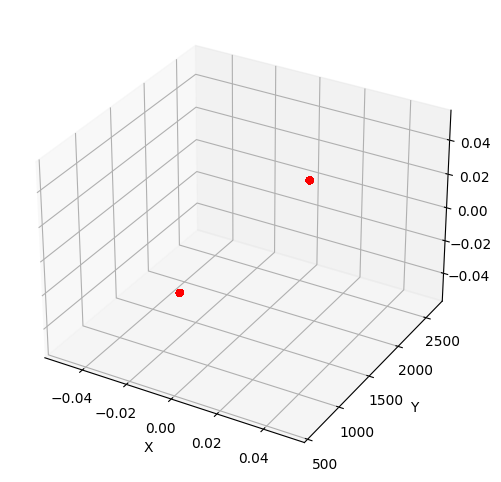

In [13]:
# Extract the xand y coordinates from the transform column of the DataFrame
x_coords = [row[0] for row in df['[LiDARCameraProjectionComponent].range_image_return1.values']]
y_coords = [row[1] for row in df['[LiDARCameraProjectionComponent].range_image_return1.shape']]


# Creating a scatter plot with x and y
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()